In [1]:
import sys
import os
import networkx as nx
import numpy as np
import pandas as pd
from scipy.stats import binom

from matplotlib import pyplot as plt
sys.path.append("../../../")
%matplotlib inline

In [2]:
#os.listdir("../../../")

In [3]:
from graph_dynamics.dynamics import PittWalker
from graph_dynamics.random_measures import process
from graph_dynamics.networks.datatypes import CaronFoxGraphs

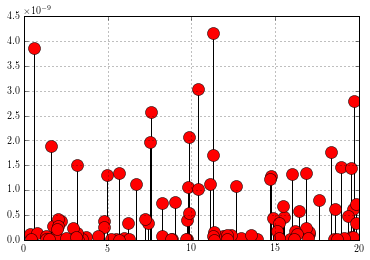

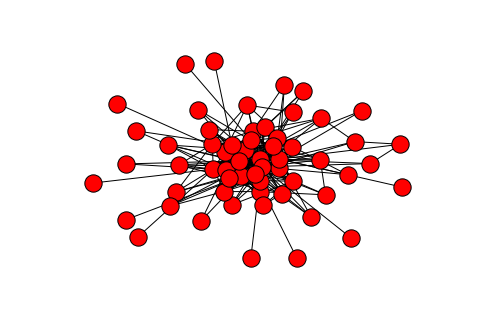

In [4]:
tau = 1.
alpha = 20.
sigma = alpha
process_identifier_string = "GammaProcess"

G = process.GammaProcess(process_identifier_string,
                         sigma,
                         tau,
                         alpha,
                         K=100)
G.plotProcess()
graph_identifier = "CaronFoxTest"
CaronFoxGraph = CaronFoxGraphs(graph_identifier,G)
nx.draw(CaronFoxGraph.network)
plt.show()

In [5]:
#Dynamics 
phi = 0.2
rho = 1.

Palla = PittWalker.PallaDynamics(phi,rho,CaronFoxGraph)
#C_TimeSeries = Palla.generateHiddenPath(10)
Networks_TimeSeries = Palla.generateNetworkPaths(10)

Time Iteration 1
Number of old tables 3.0
Number of current nodes 76
Time Iteration 2
Number of old tables 3.0
Number of current nodes 100
Time Iteration 3
Number of old tables 1
Number of current nodes 92
Time Iteration 4
Number of old tables 1.0
Number of current nodes 88
Time Iteration 5
Number of old tables 6.0
Number of current nodes 101
Time Iteration 6
Number of old tables 6.0
Number of current nodes 84
Time Iteration 7
Number of old tables 6.0
Number of current nodes 110
Time Iteration 8
Number of old tables 6.0
Number of current nodes 91
Time Iteration 9
Number of old tables 3.0
Number of current nodes 82


In [6]:
for graph in Networks_TimeSeries:
    nx.draw_networkx(graph)

Error in callback <function post_execute at 0x7f6a5ea60d70> (for post_execute):


RuntimeError: dvipng was not able to process the following file:
/tmp/matplotlib-cesar/tex.cache/a9f49b248a0b2f5c3c8cb10e52e8d413.dvi
Here is the full report generated by dvipng: 



RuntimeError: dvipng was not able to process the following file:
/tmp/matplotlib-cesar/tex.cache/c1979bc3f4b7bb684e5f4df07ad27d69.dvi
Here is the full report generated by dvipng: 



In [15]:
graph_t = Networks_TimeSeries[3]

In [16]:
print graph_t.number_of_edges()
print graph_t.number_of_nodes()

396
92


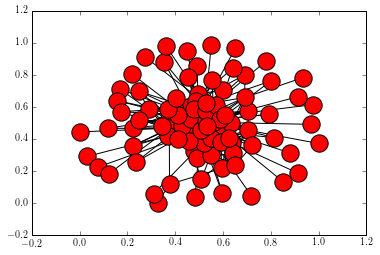

In [20]:
nx.draw_networkx(graph_t,with_labels=False)

In [9]:
def pandasDataFrameNxList(graphList,functionsDictionary):
    for graph in graphList:
        for function in
        nx.number_of_edges(Networks_TimeSeries[-1])

5661

In [10]:
{"NumberOfEdges":nx.number_of_edges,"NumberOfNodes":nx.number_of_nodes}

{'NumberOfEdges': <function networkx.classes.function.number_of_edges>}